In [182]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [185]:
# define a piecewise function
def f(x, v0, x1, x2):
    # v0: desired (or maximal) speed
    # x1: first breakpoint
    # x2: second breakpoint
    y = np.minimum(v0, np.maximum(0, v0*(x-x1)/(x2-x1)))
    return y

def loss(x, y, v0, x1, x2, power=2):
    return np.sum(np.abs((y - f(x, v0, x1, x2)))**power)/len(x)

loss: 34.361535187136425
loss (sampled): 1.5269198384649931
Inital guess - v0: 30, x1: 1, x2: 10
Fitted params - v0: 20.61, x1: 0.00, x2: 9.04
Fitted params (sampled) - v0: 27.52, x1: 0.01, x2: 16.14


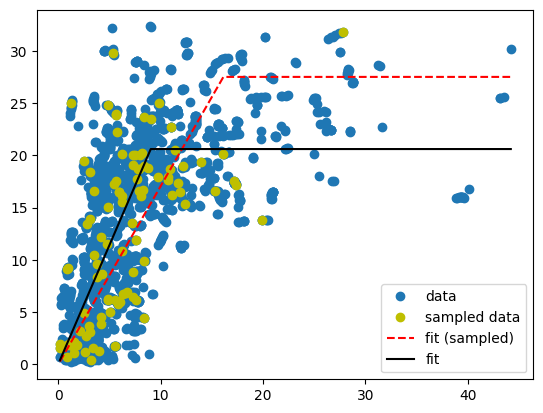

In [220]:
# import csv data
df = pd.read_csv('data.csv')
df = df.set_index('gap')

x = df.index.values
y = df['speed'].values

# set the bounds
bounds = [[0, np.inf], [0, np.inf], [0, np.inf]]

# random sampling
n_samples = 100
x_samples = x[np.random.randint(0, len(x), n_samples)]
y_samples = df.loc[x_samples]['speed'].values

# fit the data
initial_guess = [30,1,10]
res_sampled = scipy.optimize.minimize(lambda params: loss(x_samples,y_samples, *params, power=.3), x0=initial_guess, bounds=bounds)
res = scipy.optimize.minimize(lambda params: loss(x,y, *params, power=2), x0=initial_guess, bounds=bounds)

# print the result
params_descriptions = ['v0', 'x1', 'x2']
print(f'loss: {res.fun}')
print(f'loss (sampled): {res_sampled.fun}')
print('Inital guess - ' + ', '.join([f'{param}: {value}' for param, value in zip(params_descriptions, initial_guess)]))
print('Fitted params - ' + ', '.join([f'{param}: {value:.2f}' for param, value in zip(params_descriptions, res.x)]))
print('Fitted params (sampled) - ' + ', '.join([f'{param}: {value:.2f}' for param, value in zip(params_descriptions, res_sampled.x)]))

# draw the plot
plt.plot(x, y, 'o', label='data')
plt.plot(x_samples, y_samples, 'yo', label='sampled data')
plt.plot(np.sort(x), f(np.sort(x), *res_sampled.x), 'r--', label='fit (sampled)')
plt.plot(np.sort(x), f(np.sort(x), *res.x), 'k-', label='fit')
plt.legend(loc="lower right")
plt.show()
